**<h3>Discription</h3>**
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

**Import libraries**

In [ ]:
# Numpy 
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# import accourcy test library
from sklearn.metrics import accuracy_score

# import confusion_matrix
from sklearn.metrics import confusion_matrix

# import classification report
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [ ]:
# Load dataset 

df = pd.read_csv('/content/drive/MyDrive/ML_DataFile/IMDB Dataset(old).csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## **Exploratory Data Analysis**

In [ ]:
#get familier with dataset, display the top 5 data records
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# get familier with dataset, display the last 5 data records
df.tail() 

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
# get familier with dataset, display randomly 5 data records
df.sample(5) 

,review,sentiment
18084,"Deep Water (2006) ****<br /><br />""It is indif...",positive
49773,I happened to spot this flick on the shelf und...,negative
43708,"The acronymic ""F.P.1"" stands for ""Floating Pla...",negative
42085,I just watched this movie and I've gotta say t...,negative
44085,This whimsical film had the misfortune of bein...,positive


In [ ]:
# getting to know about rows and columns we're dealing with - 768 rows , 9 columns
df.shape 

(50000, 2)

In [ ]:
# learning about the columns
df.columns 

Index(['review', 'sentiment'], dtype='object')

In [ ]:
# knowledge of data type helps for computation
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
#  Print a concise summary of a DataFrame. 
#  This method prints information about a DataFrame including the index dtype and columns,
#  non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Total number of data records that have a null value in them
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# sentient values counts
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## **Data Cleaning**

In [ ]:
#get familier with dataset, display the top 5 data records
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review']=df['review'].apply(str)

list1=[]
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for sentence in df['review']:
    sentence=sentence.replace('<br /><br />','')
    for char in sentence:
        if char in punc:
          sentence=sentence.replace(char,'')

    list1.append(sentence)
df['review']=list1

In [ ]:
# sentiment values count
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# nltk import
import nltk

In [ ]:
# nltk download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
list1=stopwords.words('english')

In [ ]:
x= df['review']

In [ ]:
list3=[]
for i in df['review']:
  list2=[]
  for j in i.split():
    if j.lower() in list1:
      pass
    else:
      list2.append(j)
  list3.append(' '.join(list2))    

In [ ]:
df['review']=list3

In [ ]:
df.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


## **Data Visulization**

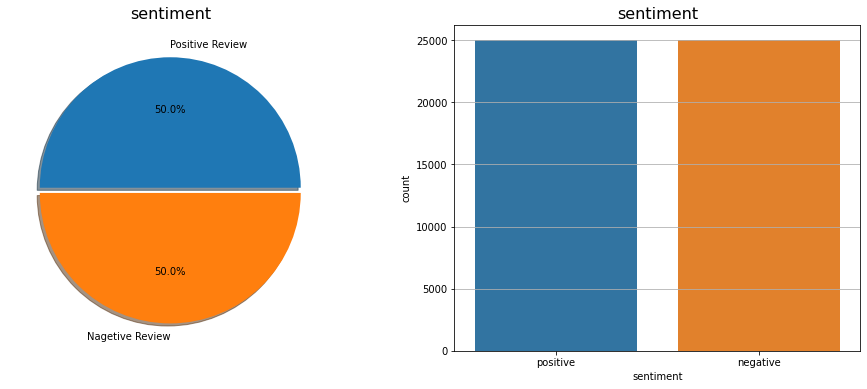

In [ ]:
# Sentiment Review Count Plot & Pi plot

f,ax=plt.subplots(1,2,figsize=(16,6))

mylabels = ['Positive Review','Nagetive Review']
df['sentiment'].value_counts().plot.pie(explode=[0,0.04],autopct='%1.1f%%',ax=ax[0],labels=mylabels ,shadow=True)
ax[0].set_title('sentiment',size=16)
ax[0].set_ylabel('')

sns.countplot('sentiment',data=df,ax=ax[1])
ax[1].set_title('sentiment',size=16)

N,P=df['sentiment'].value_counts()
plt.grid(axis='y')
plt.show()

- Out of total 50k Reviews, 25k are Positive reviews and 25k are Negative reviews.
- In the Review columns, **Positive** represent **review are positive** and **Negative** represents **review are negative**.
- The countplot tells us that the database is **Balanced** dataset.

In [ ]:
# import wordcloud 
from wordcloud import WordCloud

**Positive Sentiment Review**

In [ ]:
positive_review=df[df['sentiment']=='positive']['review']

In [ ]:
list11=[]
for sent in positive_review:
  for word in sent.split():
     word=str(word)
     list11.append(word)

In [ ]:
word_cloud = WordCloud().generate(str(list11))

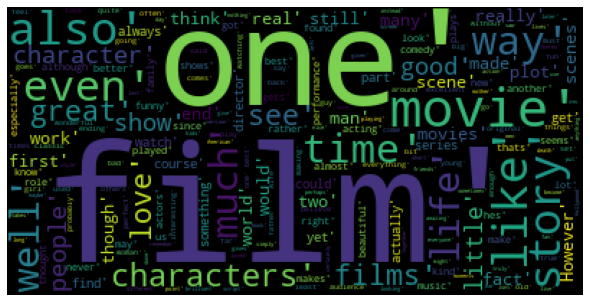

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Negative Sentiment Review**

In [ ]:
negative_review=df[df['sentiment']=='negative']['review']

In [ ]:
list11=[]
for sent in negative_review:
  for word in sent.split():
     word=str(word)
     list11.append(word)

In [ ]:
word_cloud = WordCloud().generate(str(list11))

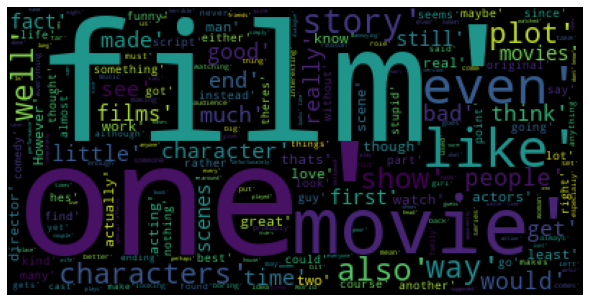

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,Catholic taught parochial elementary schools n...,negative
49998,Im going disagree previous comment side Maltin...,negative


## **TRAIN DATA TEST DATA SPLIT**

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split
x=df['review']
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# train data shape
X_train.shape, y_train.shape

((40000,), (40000,))

In [ ]:
# Test data shape
X_test.shape,y_test.shape

((10000,), (10000,))

In [ ]:
X_train.head()

39087    Thats kept asking many fights screaming matche...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent In Mood Love ...
16398    latterday Fulci schlocker totally abysmal conc...
13653    First firmly believe Norwegian movies continua...
Name: review, dtype: object

In [ ]:
y_train.head()

39087    negative
30893    negative
45278    positive
16398    negative
13653    negative
Name: sentiment, dtype: object

# **Feature Extraction**

Bag of Word (BOW)

In [ ]:
# imort feature extraction (BOW)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features= 2000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)



In [ ]:
X_test_bow.shape , X_train_bow.shape

((10000, 2000), (40000, 2000))

## **PCA**

In [ ]:
# import PCA sklearn
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
# data.dropna(inplace=True)

In [ ]:
type(X_train_bow)

scipy.sparse.csr.csr_matrix

In [ ]:
# #Creating the Dataframe having 1st principal & 2nd principal
principleComponent=pca.fit_transform(X_train_bow.todense())
principleComponent_test=pca.transform(X_test_bow.todense())

#creating new_dataframe for plotting labeled points
df=pd.DataFrame(data=principleComponent)
df_test = pd.DataFrame(data=principleComponent_test)
df['target']=y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,target
0,1.288512,-0.705568,0.883721,-0.478394,0.017134,0.777368,-1.055141,-0.285583,0.678700,-0.413286,0.566713,-0.741448,0.084485,0.066890,-0.393067,0.828695,1.288426,1.053060,-1.111642,0.519597,0.023121,-1.006952,-0.061016,0.147740,-0.038466,-0.315090,0.022395,-1.125469,0.279995,0.451144,0.511066,-0.948539,-0.494865,0.063900,0.315254,-1.638399,-0.523441,0.184192,0.106143,-0.430337,...,-1.520260,-1.050597,0.222959,-0.791145,-0.059104,-0.470173,0.247745,-0.476295,0.063006,0.476535,0.010377,0.073521,-0.208651,0.761167,-0.115415,-0.553795,-0.238602,0.134545,0.152717,-0.139963,0.524751,-0.253082,-0.059188,-0.150192,0.698708,-0.103370,0.424829,0.846482,-0.094781,0.111305,-1.059086,0.476451,0.255650,-0.117835,-0.050077,-0.355976,-0.222484,0.094179,-0.346702,positive
1,0.393581,2.905390,-0.055564,-0.105067,-0.344882,-0.161572,0.132943,-0.672713,0.384803,-0.364798,1.709330,-0.333119,-1.206910,-1.051987,0.396656,-0.050683,1.049074,0.210569,-1.414985,0.902562,1.171607,1.767083,0.644423,-0.799043,-0.763652,0.145149,-1.176055,0.374900,-0.855479,-1.209117,-0.009154,-0.959917,-1.817743,-0.380809,-0.325153,1.053860,-0.068096,0.860098,-2.682986,0.788261,...,0.011269,0.196501,0.543851,0.258375,-0.160689,-0.340842,0.183244,-0.158182,-0.568397,-0.549831,0.401966,-0.460404,0.472869,0.294538,0.587325,0.629719,0.171545,-0.638128,-0.022285,0.355656,0.001606,0.111457,0.434635,0.228139,0.590771,-0.290013,-0.491341,-0.482947,0.555426,-0.112321,0.127746,-0.071329,0.272930,-1.076457,0.513037,-0.517705,0.234714,-0.435919,-0.028121,positive
2,-2.643399,-0.771523,0.344210,-0.209129,-2.069902,0.373721,1.498202,-1.056786,1.190274,1.396240,0.380484,2.225751,1.064828,0.062412,0.393664,-0.388774,-0.010751,-0.517275,0.175226,0.363321,-0.060467,-0.619286,-0.503756,0.912008,0.449929,0.584821,-0.987626,0.080722,0.118802,-0.256051,-0.536926,0.316389,0.130144,-0.426147,-0.101215,-0.055744,0.165081,-0.144606,0.279691,0.043427,...,-0.193505,0.056033,-0.136555,0.088758,-0.026669,-0.020189,-0.146059,-0.003879,0.004667,0.004020,0.030084,-0.127591,0.073027,-0.025570,0.033442,0.048047,0.199761,-0.016646,0.119529,0.104105,0.007647,-0.125312,0.181316,-0.052661,0.182538,-0.072752,0.059197,-0.003432,0.041283,-0.027137,0.038998,-0.019086,0.100402,0.096661,0.004000,-0.087599,0.049668,0.074463,0.193499,positive
3,-2.402820,-1.345283,-0.303197,0.031844,-0.059857,-0.142899,-0.250087,-0.239624,-0.011893,-0.386244,-0.101114,-0.123683,-0.310579,0.003387,0.046760,0.074943,0.318006,0.052864,0.318952,0.128499,0.139329,-0.141310,-0.056547,0.163203,-0.675918,-0.248669,-0.294900,-0.100126,-0.147369,0.276893,0.127650,0.143873,0.554017,0.687808,0.052504,0.201516,0.448789,-0.115732,0.041287,-0.049508,...,0.036074,-0.444217,0.061626,-0.536238,0.618554,-0.690651,-0.225998,0.151565,0.489236,-0.139670,0.174105,0.056475,-0.118539,-0.118920,-0.273638,-0.072460,-0.175927,-0.071322,0.088433,-0.120240,-0.082793,0.183251,0.150718,0.145840,0.099221,-0.057467,-0.226060,-0.030938,-0.136717,-0.328884,-0.077019,-0.002240,-0.125932,0.272235,-0.172446,-0.101935,-0.018505,-0.030448,0.048182,negative
4,2.115111,5.880500,-0.643572,0.133725,0.637570,0.319679,-0.327921,1.701309,0.675374,-1.324535,1.416722,-1.030654,0.772174,1.618829,-0.239184,1.934242,0.313034,1.019888,0.954591,1.176594,1.151986,-0.249014,1.922515,0.043512,-0.419650,2.714501,1.336704,0.246621,-0.073848,-2.582431,-1.455619,0.036498,-0.346643,0.208033,1.910630,0.194032,0.100741,-1.933314,0.463644,-0.045973,...,0.876064,-0.134513,0.158937,-1.203103,0.761825,-0.543847,0.029124,0.344247,0.213588,-1.043491,-0.651638,0.246415,-0.027328,0.249668,-0.284188,-0.553728,0.393914,-0.014058,0.937611,-0.944678,0.363371,-1.220090,0.320613,-0.255293,-0.177349,-0.522108,0.018482,0.243110,-0.085862,0.438225,0.619716,-0.373172,-0.306174,-0.4

In [ ]:
pca.explained_variance_ratio_

array([0.0610225 , 0.04768276, 0.01985364, 0.01123597, 0.00913931,
       0.00807121, 0.00742378, 0.00685054, 0.00607618, 0.00593553,
       0.00576663, 0.00554099, 0.00529071, 0.00506911, 0.00483721,
       0.00476935, 0.0046369 , 0.00440678, 0.00434505, 0.00419589,
       0.00408402, 0.00404468, 0.00395261, 0.00382496, 0.00374137,
       0.00368625, 0.00356099, 0.00347685, 0.0033742 , 0.00328902,
       0.00323569, 0.00321225, 0.00313392, 0.00312678, 0.00310141,
       0.0029899 , 0.00297282, 0.0029436 , 0.00289866, 0.0028895 ,
       0.0028513 , 0.0027857 , 0.00274838, 0.00273371, 0.00268666,
       0.00261512, 0.00257247, 0.00256194, 0.00249288, 0.00244444,
       0.00240571, 0.00234949, 0.00232997, 0.00230282, 0.00226219,
       0.00225208, 0.00223254, 0.00218221, 0.00216055, 0.0021452 ,
       0.00211109, 0.00208863, 0.00206472, 0.00203676, 0.00203072,
       0.00202303, 0.00198459, 0.00196988, 0.00195162, 0.00192887,
       0.00189481, 0.00188736, 0.00187212, 0.00186719, 0.00184

## **kNeighborsClassifier(KNN) using**

In [ ]:
# import sklearn KNeighborsClassifier(KNN) 
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_bow,y_train)


y_pred_train = knn.predict(X_train_bow)
accuracy_1 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy_1)

y_pred_test = knn.predict(X_test_bow)
accuracy_1 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_1)

Accuracy for train data : 0.780775
Accuracy for test data : 0.619


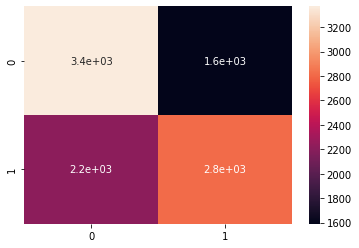

In [ ]:


c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 ,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.60      0.68      0.64      4961
Nagetive Review       0.64      0.56      0.60      5039

       accuracy                           0.62     10000
      macro avg       0.62      0.62      0.62     10000
   weighted avg       0.62      0.62      0.62     10000



# **Navie-Bayes Algorithm**

In [ ]:
# import sklearn naive_bayes 
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
gnb = MultinomialNB()
y_pred = gnb.fit(X_train_bow, y_train)

y_pred_train = gnb.predict(X_train_bow)
accuracy_2 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_2)

y_pred_test = gnb.predict(X_test_bow)
accuracy_2 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_2)

Accuracy for train data Result : 0.8435
Accuracy for test data Result : 0.8389


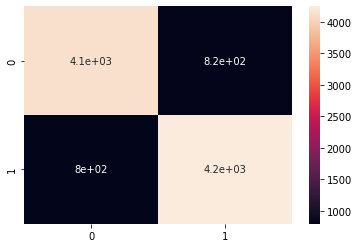

In [ ]:


c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 ,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.84      0.84      0.84      4961
Nagetive Review       0.84      0.84      0.84      5039

       accuracy                           0.84     10000
      macro avg       0.84      0.84      0.84     10000
   weighted avg       0.84      0.84      0.84     10000



## **Logistic-Regression Algroithm using grid search cv**

In [ ]:
# import Logistic-Regrassion and grid search cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   # l1 lasso l2 ridge
logreg = LogisticRegression()

# defining parameter range
logreg_cv = GridSearchCV(logreg,grid,cv=10)

# fitting the model for grid search
grid_search_log=logreg_cv.fit(X_train_bow, y_train)

In [ ]:
print("best_estimator result :-",grid_search_log.best_estimator_)
print("best_params result :-",grid_search_log.best_params_)

best_estimator result :- LogisticRegression(C=0.01)
best_params result :- {'C': 0.01, 'penalty': 'l2'}


In [ ]:
logistic = LogisticRegression(C=0.01,penalty="l2")
y_pred = logistic.fit(X_train_bow,y_train)


y_pred_train = logistic.predict(X_train_bow)
accuracy_3 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_3)

y_pred_test = logistic.predict(X_test_bow)
accuracy_3 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_3)

Accuracy for train data Result : 0.8869
Accuracy for test data Result : 0.8762


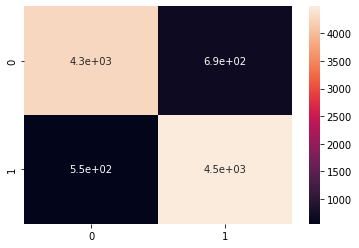

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.89      0.86      0.87      4961
Nagetive Review       0.87      0.89      0.88      5039

       accuracy                           0.88     10000
      macro avg       0.88      0.88      0.88     10000
   weighted avg       0.88      0.88      0.88     10000



## **Decision Tree Algrithm using grid search cv***

In [ ]:
# import sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bow, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [ ]:
dici_class = DecisionTreeClassifier(max_depth=9,random_state=1024,max_features='auto',ccp_alpha=0.001,criterion='entropy')
y_pred = dici_class.fit(X_train_bow,y_train)

y_pred_train = dici_class.predict(X_train_bow)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy)

y_pred_test = dici_class.predict(X_test_bow)
accuracy_4 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_4)

Accuracy for train data Result : 0.604375
Accuracy for test data Result : 0.599


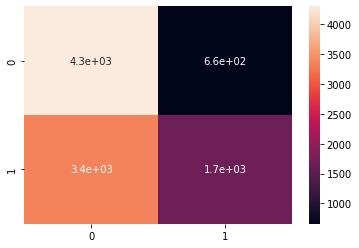

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.56      0.87      0.68      4961
Nagetive Review       0.72      0.33      0.46      5039

       accuracy                           0.60     10000
      macro avg       0.64      0.60      0.57     10000
   weighted avg       0.64      0.60      0.57     10000



## **Random Forest Machine Learning Algorithm**

In [ ]:
# import random forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators= 8)
y_pred = random.fit(X_train_bow, y_train).predict(X_test_bow)

y_pred_train = random.predict(X_train_bow)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy)

y_pred_test = random.predict(X_test_bow)
accuracy_5 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_5)

Accuracy for train data : 0.986775
Accuracy for test data : 0.7638


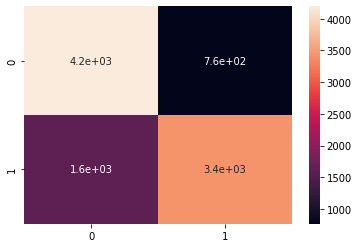

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.72      0.85      0.78      4961
Nagetive Review       0.82      0.68      0.74      5039

       accuracy                           0.76     10000
      macro avg       0.77      0.76      0.76     10000
   weighted avg       0.77      0.76      0.76     10000



# **Gradient Boosting Algorithm**

In [ ]:
# import gradient boosting algorithm
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradi = GradientBoostingClassifier(n_estimators=5, learning_rate=3.0,
    max_depth=5, random_state=0)

y_pred = gradi.fit(X_train_bow,y_train)

In [ ]:
y_pred_train = gradi.predict(X_train_bow)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = gradi.predict(X_test_bow)
accuracy_7 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_7)

Accuracy for train data :  0.46985
Accuracy for test data :  0.4776


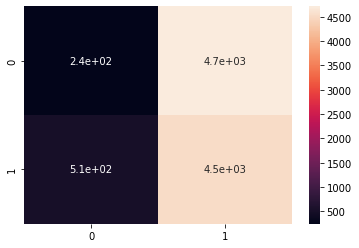

In [ ]:

c_matrix_1 = confusion_matrix(y_test, y_pred_test)

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1,annot=True)
plt.show()

In [ ]:
target_names = ['Positive Review','Nagetive Review']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

Positive Review       0.33      0.05      0.09      4961
Nagetive Review       0.49      0.90      0.63      5039

       accuracy                           0.48     10000
      macro avg       0.41      0.47      0.36     10000
   weighted avg       0.41      0.48      0.36     10000



## **Comparison**

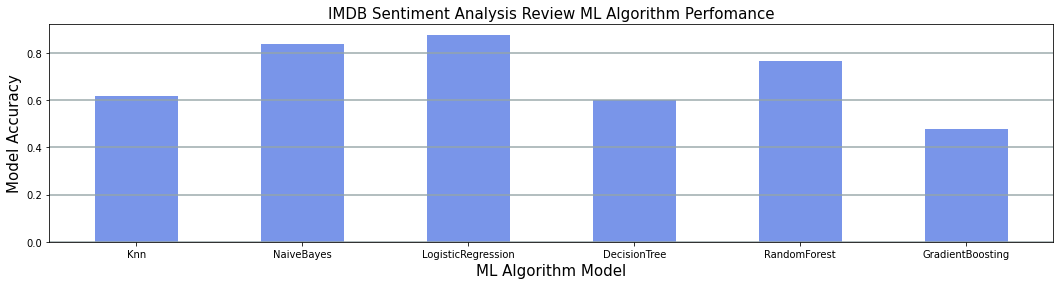

In [ ]:
#Lastly we have represented the optimal accuracy by comparing of all the algorithms applying the bar diagram

x = np.array(["Knn", "NaiveBayes", "LogisticRegression", "DecisionTree","RandomForest","GradientBoosting"])
y = np.array([accuracy_1, accuracy_2, accuracy_3,accuracy_4,accuracy_5,accuracy_7])
plt.figure(figsize=(18,4))
plt.title('IMDB Sentiment Analysis Review ML Algorithm Perfomance',size=15)
plt.xlabel('ML Algorithm Model',size=15)
plt.ylabel('Model Accuracy',size=15)
plt.bar(x,y,width  = 0.5,color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='-', linewidth=2, axis='y', alpha=0.7)

plt.show()